# WEATHER PREDICTION

Using the Columns :
* precipitation
* temp_max
* temp_min
* wind
We are going to predict the weather condition :
* drizzle
* rain
* sun
* snow
* fog

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in


import numpy as np   #linear algebra   
import pandas as pd    # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns   #for visualization of the data
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder      #for feature scaling
from sklearn.model_selection import train_test_split   #to split train and test data set
from sklearn.linear_model import LogisticRegression     #algorithm to the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics             #to check for accuracy
from sklearn.metrics import confusion_matrix   #for confusion matrix

# LOADING DATA

In [2]:
data=pd.read_csv("seattle-weather.csv")

#### to display top 5 rows of dataset

In [3]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


# DATA CLEANING

In [4]:
data.shape

(1461, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


### Checking for null values

In [6]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

### Checking for duplicates

In [7]:
data.duplicated().sum()

np.int64(0)

### Check for skewness

In [8]:
data.skew()

TypeError: could not convert string to float: '2012-01-01'

In [ ]:
data.describe()

### Spliting the data column into day , months , year

In [9]:
data[['year','month','day',]]=data['date'].str.split('-',expand=True)

In [10]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,01,01
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,01,02
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,01,03
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,01,04
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,01,05


### drop the date column

In [11]:
data.drop('date',axis=1,inplace=True)

In [12]:
data.head()

,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,0.0,12.8,5.0,4.7,drizzle,2012,01,01
1,10.9,10.6,2.8,4.5,rain,2012,01,02
2,0.8,11.7,7.2,2.3,rain,2012,01,03
3,20.3,12.2,5.6,4.7,rain,2012,01,04
4,1.3,8.9,2.8,6.1,rain,2012,01,05


# EDA process

In [13]:
data.columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather', 'year',
       'month', 'day'],
      dtype='object')

# Univariant Analysis

In [14]:
column=['precipitation', 'temp_max', 'temp_min', 'wind']

In [15]:
for i in column:
    plt.figure(figsize=(5,4))
    sns.boxplot(i,data=data)
    plt.show()

TypeError: boxplot() got multiple values for argument 'data'

<Figure size 500x400 with 0 Axes>

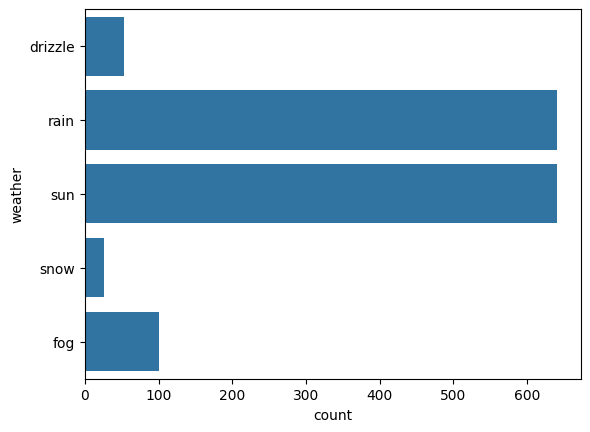

In [16]:
sns.countplot(data['weather'])
plt.show()

# Bivariant Analysis

In [17]:
data.weather.unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

/tmp/ipykernel_34436/2303561852.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["precipitation"][data.weather=='drizzle'])
/home/sopnic2/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/tmp/ipykernel_34436/2303561852.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an a

<Axes: xlabel='precipitation', ylabel='Density'>

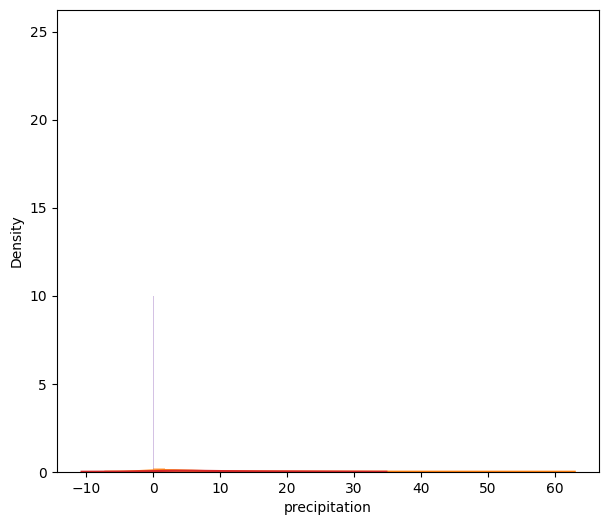

In [18]:
plt.figure(figsize=(7,6))
sns.distplot(data["precipitation"][data.weather=='drizzle'])
sns.distplot(data["precipitation"][data.weather=='rain'])
sns.distplot(data["precipitation"][data.weather=='sun'])
sns.distplot(data["precipitation"][data.weather=='snow'])
sns.distplot(data["precipitation"][data.weather=='fog'])

/tmp/ipykernel_34436/2993591389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["temp_max"][data.weather=='drizzle'])
/tmp/ipykernel_34436/2993591389.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["temp_max"][data.weather=='rain'])
/tmp/ipykernel_34436/2993591389.py:4: UserWar

<Axes: xlabel='temp_max', ylabel='Density'>

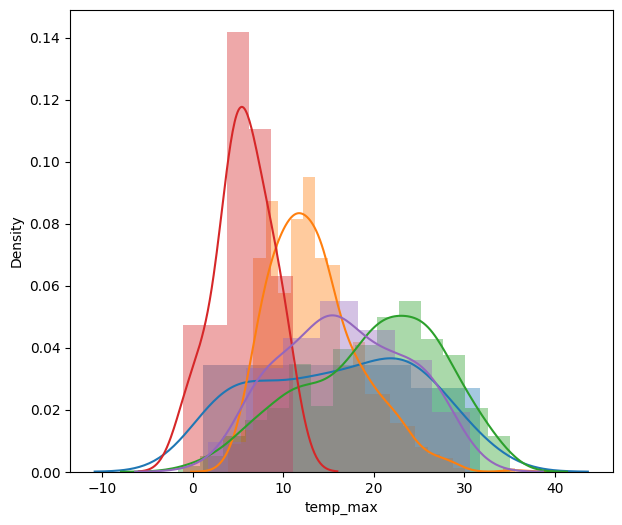

In [19]:
plt.figure(figsize=(7,6))
sns.distplot(data["temp_max"][data.weather=='drizzle'])
sns.distplot(data["temp_max"][data.weather=='rain'])
sns.distplot(data["temp_max"][data.weather=='sun'])
sns.distplot(data["temp_max"][data.weather=='snow'])
sns.distplot(data["temp_max"][data.weather=='fog'])

/tmp/ipykernel_34436/1964431829.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["temp_min"][data.weather=='drizzle'])
/tmp/ipykernel_34436/1964431829.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["temp_min"][data.weather=='rain'])
/tmp/ipykernel_34436/1964431829.py:4: UserWar

<Axes: xlabel='temp_min', ylabel='Density'>

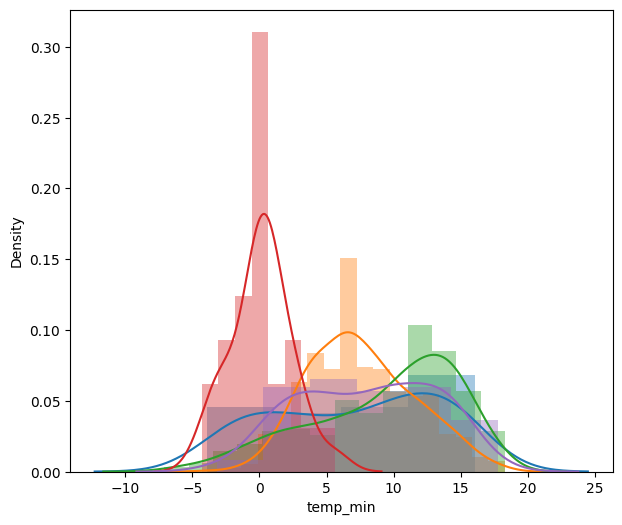

In [20]:
plt.figure(figsize=(7,6))
sns.distplot(data["temp_min"][data.weather=='drizzle'])
sns.distplot(data["temp_min"][data.weather=='rain'])
sns.distplot(data["temp_min"][data.weather=='sun'])
sns.distplot(data["temp_min"][data.weather=='snow'])
sns.distplot(data["temp_min"][data.weather=='fog'])

/tmp/ipykernel_34436/4112454410.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["wind"][data.weather=='drizzle'])
/tmp/ipykernel_34436/4112454410.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["wind"][data.weather=='rain'])
/tmp/ipykernel_34436/4112454410.py:4: UserWarning: 



<Axes: xlabel='wind', ylabel='Density'>

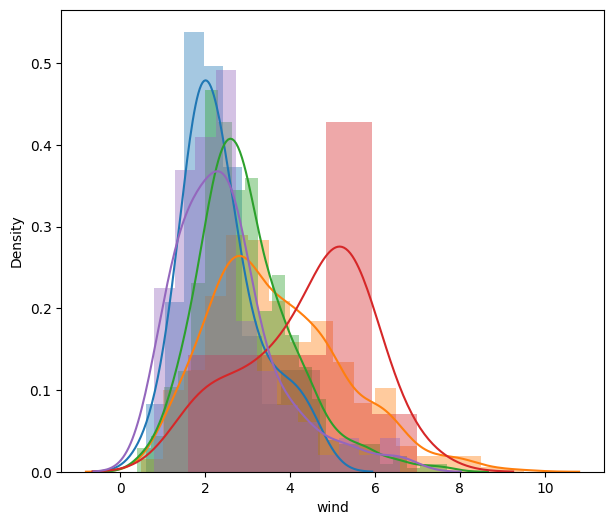

In [21]:
plt.figure(figsize=(7,6))
sns.distplot(data["wind"][data.weather=='drizzle'])
sns.distplot(data["wind"][data.weather=='rain'])
sns.distplot(data["wind"][data.weather=='sun'])
sns.distplot(data["wind"][data.weather=='snow'])
sns.distplot(data["wind"][data.weather=='fog'])


# Multivariant Analysis

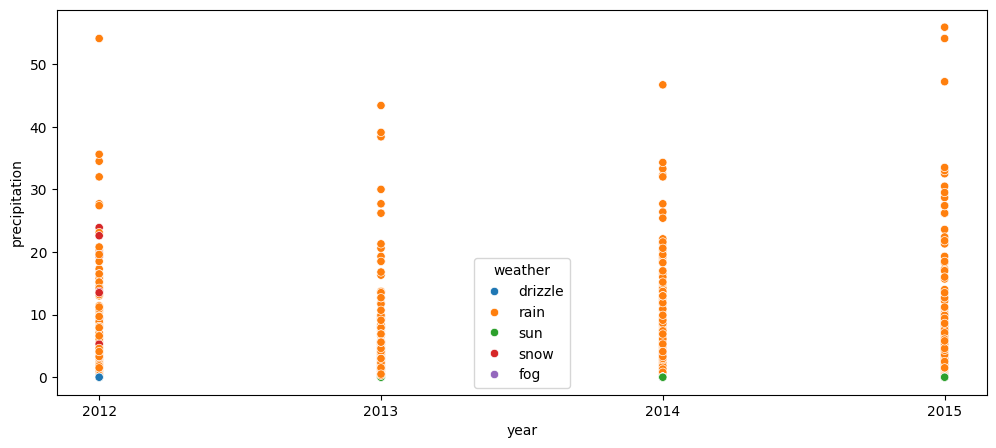

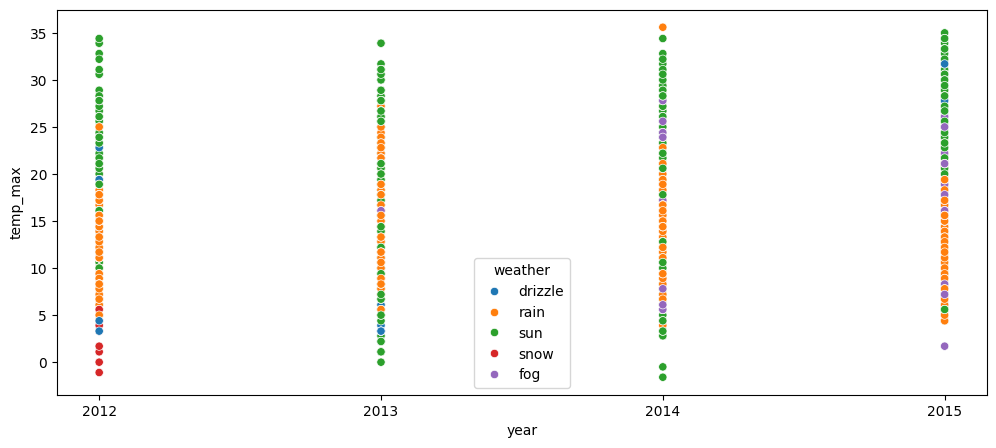

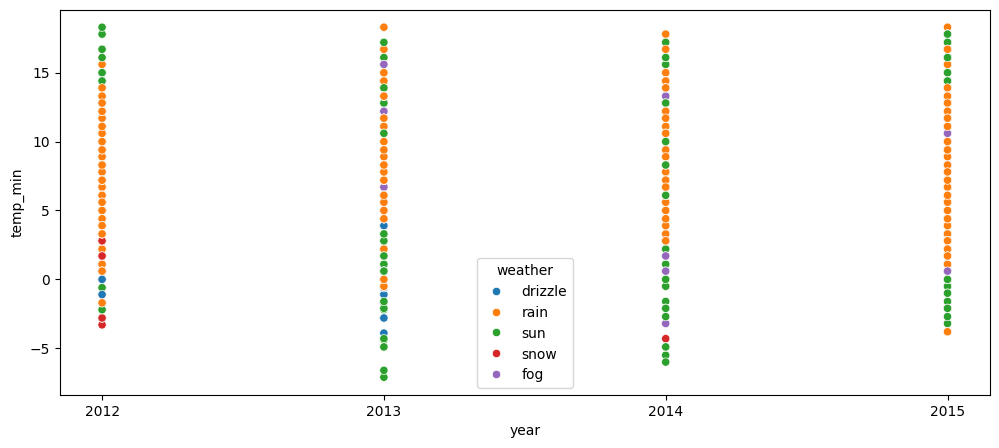

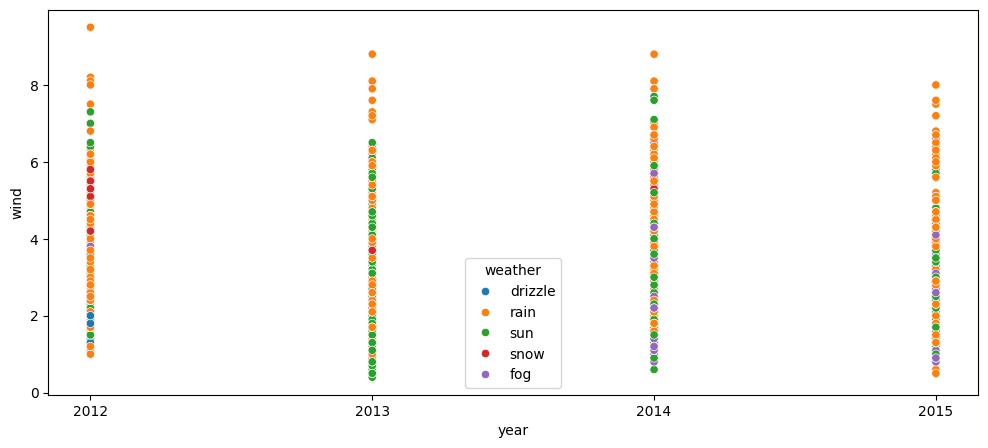

In [22]:
for i in column:
 plt.figure(figsize=(12,5))
 sns.scatterplot(x='year',y=i,hue="weather",data=data)
 plt.show()

# Train and Test data Spliting

In [23]:
x=data.drop('weather',axis=1)

In [24]:
x

,precipitation,temp_max,temp_min,wind,year,month,day
0,0.0,12.8,5.0,4.7,2012,01,01
1,10.9,10.6,2.8,4.5,2012,01,02
2,0.8,11.7,7.2,2.3,2012,01,03
3,20.3,12.2,5.6,4.7,2012,01,04
4,1.3,8.9,2.8,6.1,2012,01,05
...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2015,12,27
1457,1.5,5.0,1.7,1.3,2015,12,28
1458,0.0,7.2,0.6,2.6,2015,12,29
1459,0.0,5.6,-1.0,3.4,2015,12,30


In [25]:
y=data['weather']

In [26]:
y

0       drizzle
1          rain
2          rain
3          rain
4          rain
         ...   
1456       rain
1457       rain
1458        fog
1459        sun
1460        sun
Name: weather, Length: 1461, dtype: object

# Feature Scaling

In [27]:
labelencoder=LabelEncoder()
y=labelencoder.fit_transform(y)

In [28]:
y

array([0, 2, 2, ..., 1, 4, 4], shape=(1461,))

### spliting the data into train and test data

In [29]:
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.3)

# Algorithm 

### Logistic Regresssion

In [30]:
model=LogisticRegression()
model.fit(X_train,y_train)

/home/sopnic2/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [31]:
y_pred = model.predict(X_test)

In [32]:
model.score(X_test,y_test)

0.7761485826001955

### Random forest Classifier

In [33]:
model=RandomForestClassifier(n_estimators= 10, criterion="entropy")
model.fit(X_train,y_train)

,n_estimators,10
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [34]:
y_pred1=model.predict(X_test)

In [35]:
y_pred1

array([2, 2, 1, ..., 2, 4, 4], shape=(1023,))

In [36]:
model.score(X_test,y_test)

0.8318670576735093

### Support Machine Classifier

In [37]:
classfier=SVC(kernel='linear',random_state=0)
classfier.fit(X_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [38]:
y_pred2=classfier.predict(X_test)

In [39]:
y_pred2

array([2, 2, 4, ..., 2, 4, 4], shape=(1023,))

In [40]:
metrics.accuracy_score(y_test,y_pred2)

0.8240469208211144

# Confusion matrix

In [41]:
confusion_matrix(y_test, y_pred)

array([[  0,   0,   4,   1,  35],
       [  0,   0,   3,   1,  69],
       [  0,   0, 389,   0,  74],
       [  0,   0,  18,   0,   1],
       [  0,   0,  22,   1, 405]])